In [80]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
image_size=256
batch_size=32
channels=3
epochs=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset), 68*32

(68, 2176)

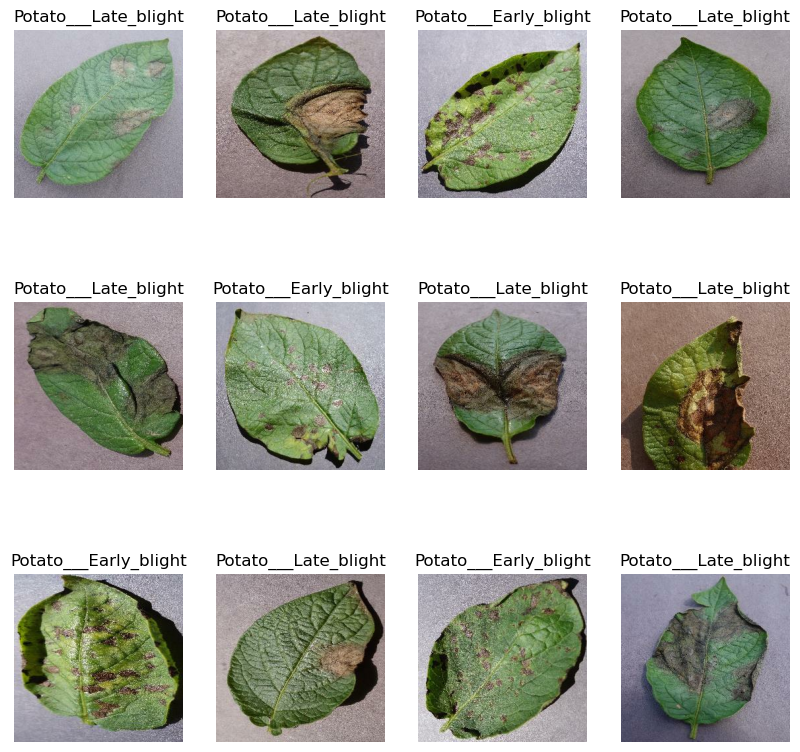

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,
                             shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        df=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds
    

In [8]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [9]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_scale=tf.keras.Sequential([
    layers.Resizing(image_size,image_size),
    layers.Rescaling(1.0/255)])
    

In [11]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)])

In [12]:
n_classes=3
input_shape=(batch_size,image_size,image_size,channels)
model=models.Sequential([
    resize_and_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])
model.build(input_shape=input_shape)

C:\Users\giorg\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"])

In [15]:
history=model.fit(train_ds,epochs=20,batch_size=batch_size,verbose=1,
          validation_data=val_ds)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 636ms/step - accuracy: 0.4803 - loss: 0.9370 - val_accuracy: 0.6921 - val_loss: 0.8109
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 625ms/step - accuracy: 0.6955 - loss: 0.7234 - val_accuracy: 0.7089 - val_loss: 0.5747
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 624ms/step - accuracy: 0.7929 - loss: 0.4512 - val_accuracy: 0.8669 - val_loss: 0.3252
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 610ms/step - accuracy: 0.8823 - loss: 0.3017 - val_accuracy: 0.8900 - val_loss: 0.2963
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 673ms/step - accuracy: 0.9226 - loss: 0.2252 - val_accuracy: 0.9051 - val_loss: 0.2323
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 622ms/step - accuracy: 0.8999 - loss: 0.2506 - val_accuracy: 0.8999 - val_loss: 0.2747
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 605ms/step - accuracy: 0.9330 - loss: 0.1788 - val_accuracy: 0.9329 - val_loss: 0.1896
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 603ms/step - accuracy: 0.9540 - loss: 0.1115 - val_accu

In [32]:
scores=model.evaluate(test_ds)

54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9638 - loss: 0.1093


In [34]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [36]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [48]:
d={}
for key in history.history.keys():
    d["{}".format(key)]=history.history["{}".format(key)]
print(d)
    

{'accuracy': [0.4930555522441864, 0.7013888955116272, 0.8356481194496155, 0.8778935074806213, 0.8993055820465088, 0.9108796119689941, 0.9363425970077515, 0.9606481194496155, 0.9664351940155029, 0.9577546119689941, 0.9658564925193787, 0.9710648059844971, 0.9756944179534912, 0.9820601940155029, 0.9699074029922485, 0.9756944179534912, 0.9762731194496155, 0.9803240895271301, 0.9774305820465088, 0.9791666865348816], 'loss': [0.89809250831604, 0.6604100465774536, 0.3887239694595337, 0.3087863326072693, 0.25470706820487976, 0.2172262817621231, 0.16612285375595093, 0.09739023447036743, 0.09896039217710495, 0.11073974519968033, 0.08663548529148102, 0.07968076318502426, 0.06879311054944992, 0.046477533876895905, 0.08702515810728073, 0.08145652711391449, 0.06309002637863159, 0.04715142771601677, 0.06829217076301575, 0.045827582478523254], 'val_accuracy': [0.6921296119689941, 0.7089120149612427, 0.8668981194496155, 0.8900462985038757, 0.9050925970077515, 0.8998842835426331, 0.9328703880310059, 0.9

In [56]:
df=pd.DataFrame(data=d)
df["epoch"]=range(0,20)
df

accuracy      loss  val_accuracy  val_loss  epoch
0   0.493056  0.898093      0.692130  0.810883      0
1   0.701389  0.660410      0.708912  0.574738      1
2   0.835648  0.388724      0.866898  0.325201      2
3   0.877894  0.308786      0.890046  0.296285      3
4   0.899306  0.254707      0.905093  0.232311      4
5   0.910880  0.217226      0.899884  0.274666      5
6   0.936343  0.166123      0.932870  0.189634      6
7   0.960648  0.097390      0.951389  0.116602      7
8   0.966435  0.098960      0.946759  0.146021      8
9   0.957755  0.110740      0.925347  0.217455      9
10  0.965856  0.086635      0.950810  0.145734     10
11  0.971065  0.079681      0.920139  0.235320     11
12  0.975694  0.068793      0.983796  0.044275     12
13  0.982060  0.046478      0.955440  0.153336     13
14  0.969907  0.087025      0.973380  0.073756     14
15  0.975694  0.081457      0.976273  0.062423     15
16  0.976273  0.063090      0.958912  0.109264     16
17  0.980324  0.047151      0.975694  0.068518     17
18  0.977431  0.068292      0.969329  0.093028     18
19  0.979167  0.045828      0.962384  0.111224     19

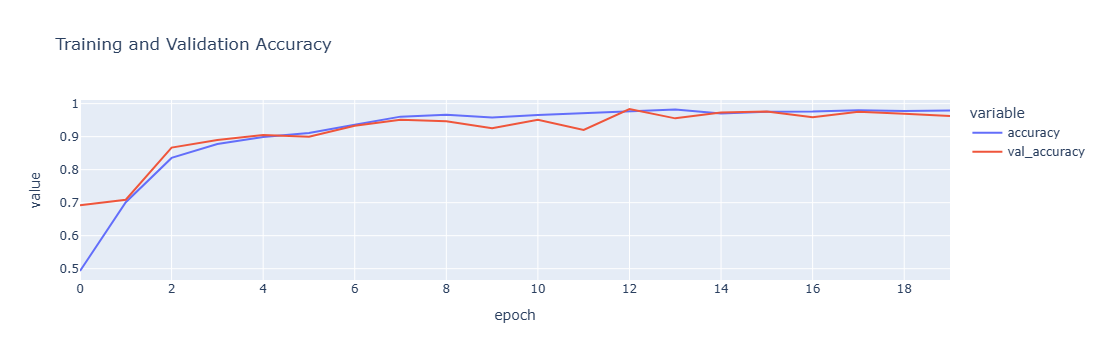

In [66]:
fig=px.line(df,x="epoch",y=["accuracy","val_accuracy"],title="Training and Validation Accuracy")
fig.show()

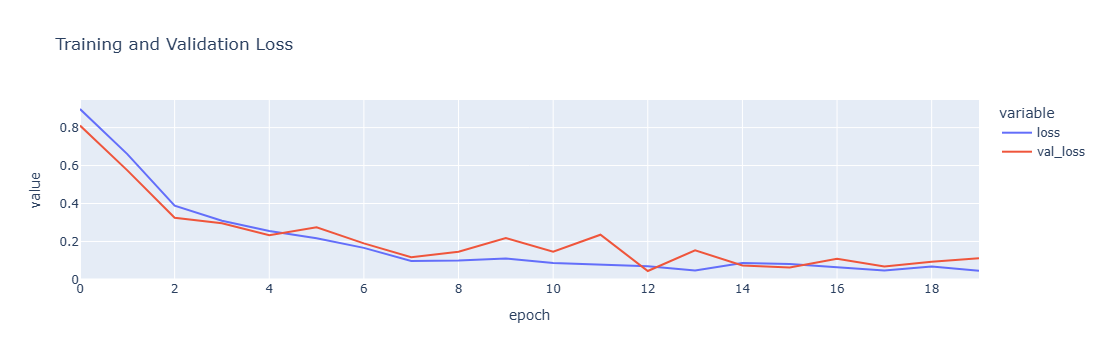

In [68]:
fig=px.line(df,x="epoch",y=["loss","val_loss"],title="Training and Validation Loss")
fig.show()

First image to predict
Actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predicted label: Potato___Early_blight


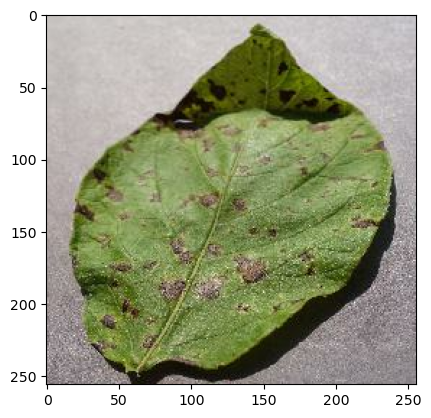

In [92]:
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    first_label=labels_batch[0].numpy()
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])
    batch_prediction=model.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])
    

In [106]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) # Create a batch
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


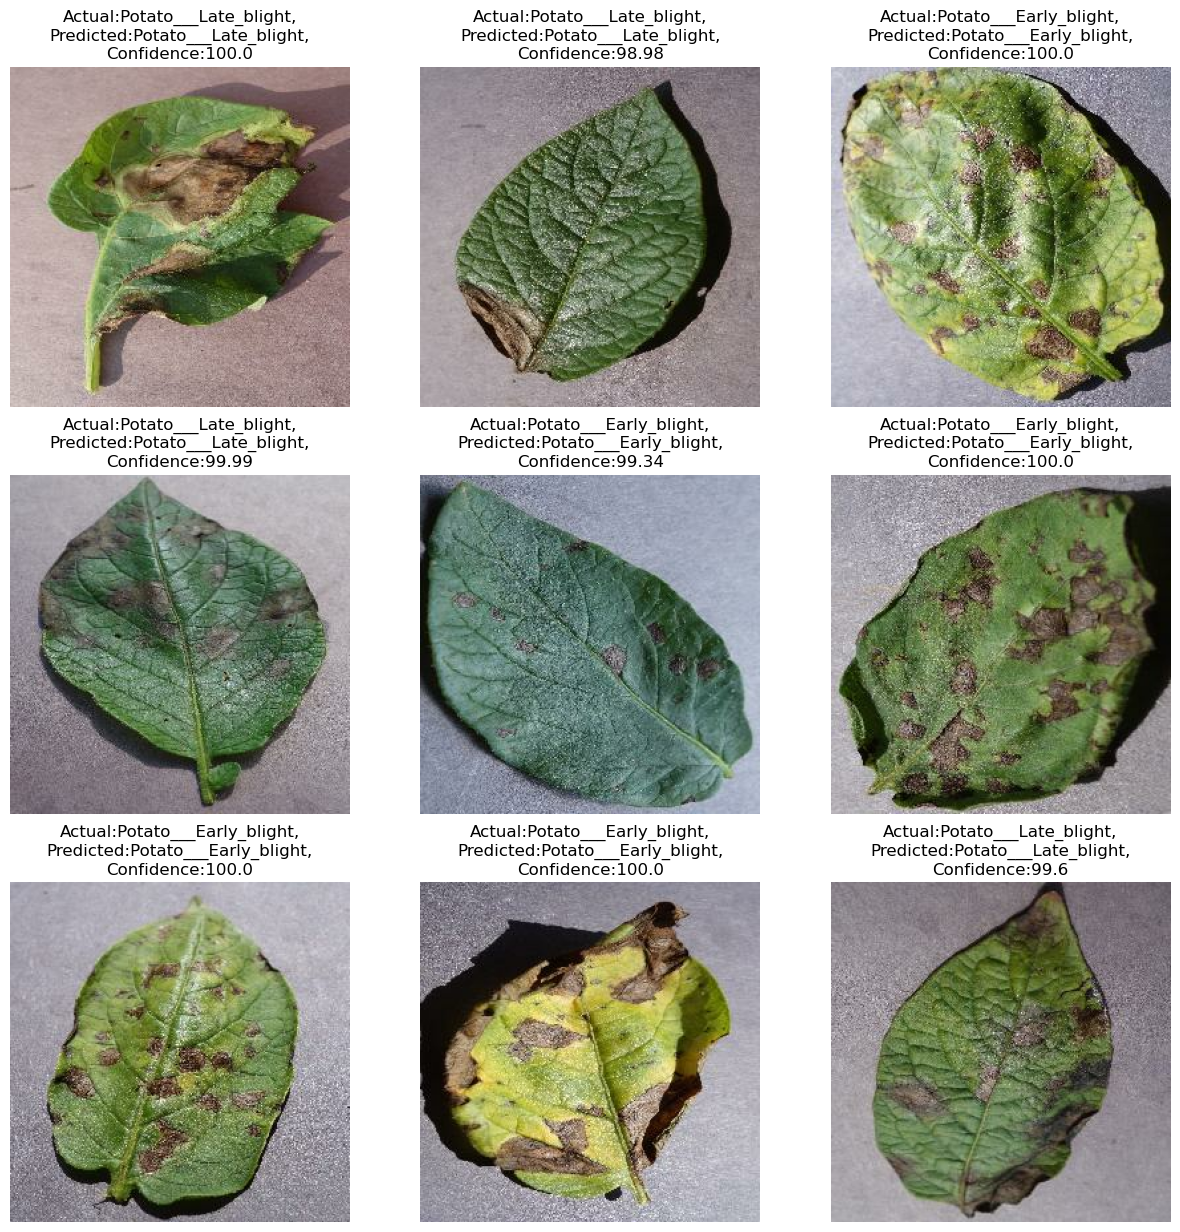

In [108]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title("Actual:{},\nPredicted:{},\nConfidence:{}".format(actual_class,predicted_class,confidence))
        plt.axis("off")